<a href="https://colab.research.google.com/github/noahdrakes/dlhw4/blob/main/DeepLearning_Fall2024_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning (Fall 2024) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include this notebook (.ipynb file) and a PDF of this notebook with all cell outputs.

## Problem 1a)

### Imports

In [ ]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [ ]:
## Spectify Path to Provided Data Here
DATA_PATH = 'fall24_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

print(X)
print(Y)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)
[[519.48721287 888.95100171]
 [745.53262956 842.68476576]
 [307.78113114  52.81253746]
 ...
 [551.44036935 537.03436581]
 [899.07940013 355.18322282]
 [405.40856945  57.12130823]]
[1. 0. 0. ... 1. 0. 0.]


### Visualization Code

Do not touch any of the visualization code below.

In [ ]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """

    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """

    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

<ipython-input-3-6958d58fb1fa>:8: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon1 = Polygon(p0, True)
<ipython-input-3-6958d58fb1fa>:9: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon2 = Polygon(p1, True)


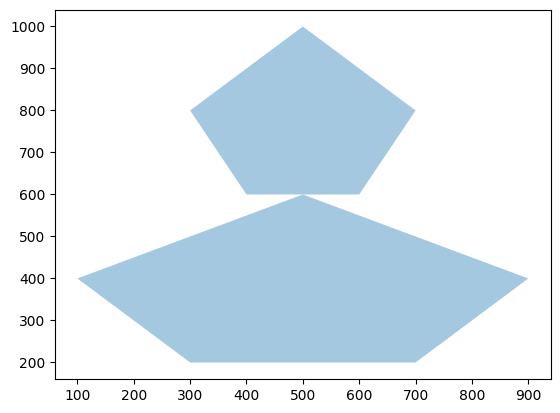

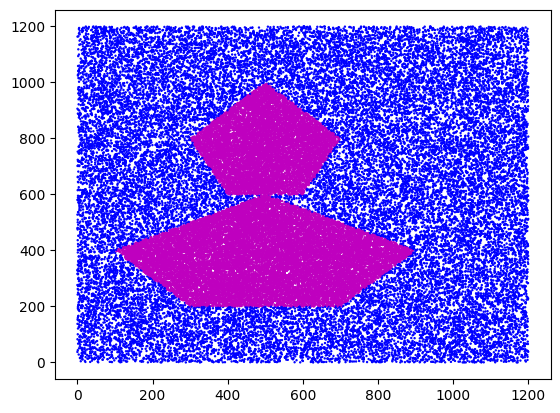

In [ ]:
visualize_polygons(p0,p1)
visualize_datapoints(X, Y)

### Problem 1a)

Please fill in all code blocks marked with a #TODO.

In [ ]:
def threshold_activation1(x):
    """

    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    """
    # TODO:

    count_ones = 0

    for threshold in x:
      if threshold == 0:
        return 0
    return 1


def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    for threshold in x:
      if threshold == 1:
        return 1
    return 0


def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):
    """

    """
    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Through Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        # second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        # second_gate_output = and_gate(second_polygon)
        # Output layer
        # input_to_final_gate = [first_gate_output, second_gate_output]
        # prediction = or_gate(input_to_final_gate)
        predictions.append(first_gate_output)
    return predictions

## CHANGE I MADE: deleted print for the accuracy function.
## i may need to create a new acc function for my model
def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    # print("Accuracy: ", accuracy)
    return accuracy

def test(x):
  print("working")
  new_x = np.array(X)
  y = np.copy(x)
  y[y <= 0] = 0
  y[y > 0] = 1
  print(y)

In [ ]:
x = X


test(x)

working
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

[1. 0. 0. ... 1. 0. 0.]


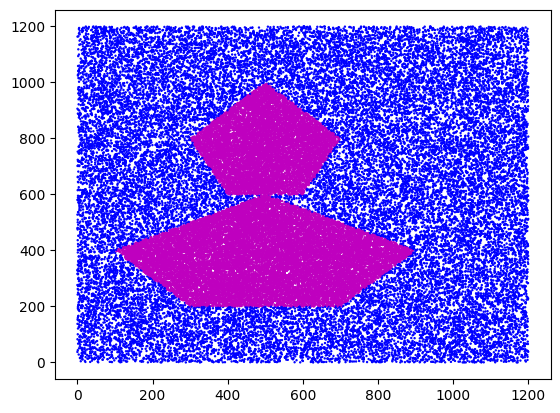

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

print(Y)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

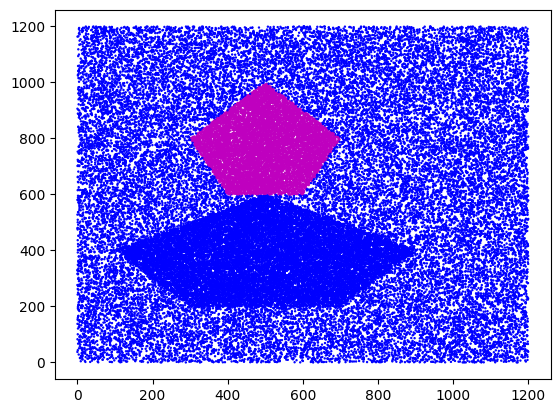

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

### Problem 1b)


In [ ]:
# 1b

#Imports

import torch
import torch.nn as nn
import tensorflow as tf

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
import numpy as np
import matplotlib.pyplot as plt
import pandas as Pd

import gc


In [ ]:
# Process Data
## split data into training and test set

def split_test_training_set(X, Y, training_split):
    # Ensure that the training split is between 1 and 5999
    assert(training_split <= 5999)
    assert(training_split >= 1)

    # Split the data into training and test sets using slicing
    trainingX = X[:training_split, :]  # First part for training set
    trainingY = Y[:training_split]     # Corresponding labels for training

    testX = X[training_split:, :]      # Remaining part for test set
    testY = Y[training_split:]         # Corresponding labels for test

    return trainingX, trainingY, testX, testY


## first we need to zero centor the data
def data_preprocessing(X):

  x1_mean = X[:,0].mean()
  x2_mean = X[:,1].mean()

  x1_std = X[:,0].std()
  x2_std = X[:,1].std()

  # Normalize X using the mean and std
  X[:, 0] = (X[:, 0] - x1_mean) / x1_std
  X[:, 1] = (X[:, 1] - x2_mean) / x2_std

  return X, x1_mean, x2_mean, x1_std, x2_std

def data_post_processing(X, x1_mean, x2_mean, x1_std, x2_std):
  X[:, 0] = (X[:, 0] - x1_mean) / x1_std
  X[:, 1] = (X[:, 1] - x2_mean) / x2_std
  return X


def convert_data_to_tensor(X, Y):
  return torch.from_numpy(X).type(torch.int32) , torch.from_numpy(Y).type(torch.int32)


In [ ]:
# Model

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid_stack = nn.Sequential(
          nn.Linear(2, 10),
          nn.Sigmoid(),
          nn.Linear(10,2),
          nn.Sigmoid(),
          nn.Linear(2, 1),
          nn.Sigmoid()  # Add Sigmoid activation at the final output
        )

    def forward(self, x):
        logits = self.linear_sigmoid_stack(x)
        return logits

    def predict(self, x):
      logits = self.forward(x)
      return (logits >= .5).float()

def initialize_weights(model):
  if isinstance(model, nn.Linear):
    nn.init.xavier_uniform_(model.weight)


In [ ]:
# Train


def train(x,
          y,
          seed,
          learning_rate,
          epoch_size,
          loss_function=nn.BCELoss(),
          accuracy_function=calc_accuracy):


  train_loss_data = np.zeros((epoch_size,))
  train_accuracy_data = np.zeros((epoch_size,))

  torch.manual_seed(seed)
  model = NeuralNetwork()
  model.apply(initialize_weights)

  for param in model.parameters():
    print(param.data)
  optimizer = torch.optim.SGD(params = model.parameters(), lr=learning_rate ,momentum=0.9)

  print("")
  print("")
  print("")
  print("")
  print("")
  print("-------SEED: ---------", seed)

  for epoch in range(epoch_size):
    model.train()
    y_hat = model(x)
    loss = loss_function(y_hat, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
      predictions = model.predict(x)

      train_loss = loss_function(predictions, y)
      train_acc = accuracy_function(predictions, y)

      train_loss_data[epoch] = train_loss
      train_accuracy_data[epoch] = train_acc

    if epoch % 20 == 0:
      print("test loss: ", train_loss)
      print("test acc: ", train_acc)

  return model, train_loss, train_acc, train_loss_data, train_accuracy_data

In [ ]:
# DATA PREPROCESSING
trainX, trainY, testX, testY = split_test_training_set(X, Y, 5000)

trainX, x1_mean, x2_mean, x1_std, x2_std = data_preprocessing(trainX)

print(x1_mean, x2_mean, x1_std, x2_std)

tensorX = torch.from_numpy(trainX).type(torch.float32)
tensorY = torch.from_numpy(trainY).type(torch.float32)

print(tensorX.type())
print(tensorX)
print(tensorY.shape[0])

tensorY = tensorY.reshape((tensorY.shape[0], 1))
print(tensorY.shape)


564.6222493969127 562.2490013319965 293.7166969143032 303.8135715069408
torch.FloatTensor
tensor([[-0.1537,  1.0753],
        [ 0.6159,  0.9231],
        [-0.8745, -1.6768],
        ...,
        [-1.1733, -0.7296],
        [ 0.1088, -0.9641],
        [-0.6334, -0.5724]])
5000
torch.Size([5000, 1])


In [ ]:
# test train

## let's test the model

seeds = [123, 100, 4444, 54, 3]
epoch_size = 500

for seed in seeds:
  model , x, f, g, e = train(tensorX, tensorY, seed, 1.3, epoch_size)

564.6222493969127 562.2490013319965 293.7166969143032 303.8135715069408
torch.FloatTensor
tensor([[-0.1537,  1.0753],
        [ 0.6159,  0.9231],
        [-0.8745, -1.6768],
        ...,
        [-1.1733, -0.7296],
        [ 0.1088, -0.9641],
        [-0.6334, -0.5724]])
5000
torch.Size([5000, 1])
tensor([[-0.6572, -0.4373],
        [ 0.6036,  0.0423],
        [-0.5728,  0.1115],
        [ 0.5843, -0.6682],
        [-0.4761, -0.2816],
        [ 0.0284, -0.1649],
        [-0.0777, -0.6894],
        [ 0.3311,  0.6207],
        [ 0.4322, -0.5007],
        [-0.5700,  0.2936]])
tensor([ 0.5000,  0.1317,  0.1934,  0.6825, -0.3189,  0.2240, -0.3146,  0.5053,
         0.5647, -0.6519])
tensor([[ 0.0159,  0.2899, -0.6910, -0.0422,  0.4987,  0.3280,  0.0258,  0.1390,
         -0.0669, -0.3888],
        [-0.2672, -0.4306,  0.5873,  0.3891,  0.2473, -0.5422,  0.5456,  0.2217,
          0.4892, -0.2782]])
tensor([0.1122, 0.0687])
tensor([[0.2998, 1.3808]])
tensor([-0.0914])





-------SEED: ------

In [ ]:
## 1b Different Epoch Size

# BESTTTT
model1, train_loss, train_acc, train_loss_data, train_accuracy_data = train(tensorX, tensorY, 1.5, 3, 400)

tensor([[ 0.5668, -0.0331],
        [-0.4720,  0.4306],
        [ 0.2195, -0.4571],
        [ 0.4593,  0.4293],
        [ 0.6271, -0.3964],
        [-0.1164, -0.0137],
        [ 0.1033, -0.5366],
        [-0.5018,  0.3847],
        [-0.1658,  0.3454],
        [ 0.0403,  0.2322]])
tensor([-0.2633, -0.4271, -0.1185, -0.3050, -0.2266,  0.0339,  0.4215,  0.3843,
        -0.6912,  0.4383])
tensor([[ 0.1555,  0.2571,  0.3505, -0.6549,  0.3559, -0.4972, -0.5335,  0.0430,
         -0.1205,  0.4153],
        [-0.4095, -0.6286,  0.5146, -0.1049,  0.3977,  0.2273, -0.5302,  0.1421,
          0.1698, -0.4734]])
tensor([-0.3040, -0.1508])
tensor([[-0.6710,  0.4822]])
tensor([0.7043])





-------SEED: --------- 1.5
test loss:  tensor(50.0800)
test acc:  0.4992
test loss:  tensor(31.6000)
test acc:  0.684
test loss:  tensor(27.4000)
test acc:  0.726
test loss:  tensor(14.3200)
test acc:  0.8568
test loss:  tensor(12.7200)
test acc:  0.8728
test loss:  tensor(9.7400)
test acc:  0.9026
test loss:  ten

In [ ]:
# plot functions

def plot_accuracy(train_accuracy_data):
  epochs = train_accuracy_data.shape[0]
  epoch_array = range(epochs)

  fig, ax = plt.subplots()
  ax.plot(epoch_array, train_accuracy_data)

  ax.set(xlabel="epochs", ylabel='accuracy', title='training accuracy')
  plt.show()

def plot_loss(train_loss_data):
  epochs = train_loss_data.shape[0]
  epoch_array = range(epochs)

  fig, ax = plt.subplots()
  ax.plot(epoch_array, train_loss_data)

  ax.set(xlabel="epochs", ylabel='loss', title='training loss')
  plt.show()

def visualize_polygon_classifier(model):
  all_points = np.zeros((1000*1000, 2))
  model.eval()

  with torch.inference_mode():

    for i in range(1000):
      for j in range(1000):
        all_points[i+j] = np.array([i,j])

  tensor_point = torch.from_numpy(all_points).type(torch.float32)
  y = model.predict(tensor_point)

  y = y.numpy()

  # polygon_points = np.zeros(1)

  # for i,output in enumerate(y):
  #   if output == 1:
  #     polygon_points = np.insert(polygon_points,polygon_points.shape[0] - 1, all_points[i])
  plt.ion()  # Turn on interactive mode for real-time plotting
  fig, ax = plt.subplots()
  ax.set_xlim(0, 1000)
  ax.set_ylim(0, 1000)

  sc = ax.scatter([], [])

  for i,output in enumerate(y):

    if output == 1:
      sc = ax.scatter(all_points[i][0], all_points[i][1], color='blue')

  plt.ioff()  # Turn off interactive mode
  plt.show()

def vis_polygon(model, x1_mean, x2_mean, x1_std, x2_std ):

    x = np.linspace(0, 1000, 1000)
    y = np.linspace(0, 1000, 1000)
    xx, yy = np.meshgrid(x, y)


    all_points = np.c_[xx.ravel(), yy.ravel()]

    normalized_points = all_points.copy()

    normalized_points[:, 0] = (normalized_points[:, 0] - x1_mean) / x1_std
    normalized_points[:, 1] = (normalized_points[:, 1] - x2_mean) / x2_std

    tensor_point = torch.from_numpy(normalized_points).float()

    model.eval()
    with torch.no_grad():
        y_pred = model.predict(tensor_point)


    y_pred = y_pred.numpy().reshape(xx.shape)

    plt.ion()
    fig, ax = plt.subplots()

    ax.set_xlim(0, 1200)
    ax.set_ylim(0, 1200)

    ax.scatter(all_points[y_pred.ravel() == 1][:, 0], all_points[y_pred.ravel() == 1][:, 1],s=0.1, color='blue')

    plt.ioff()
    plt.show()


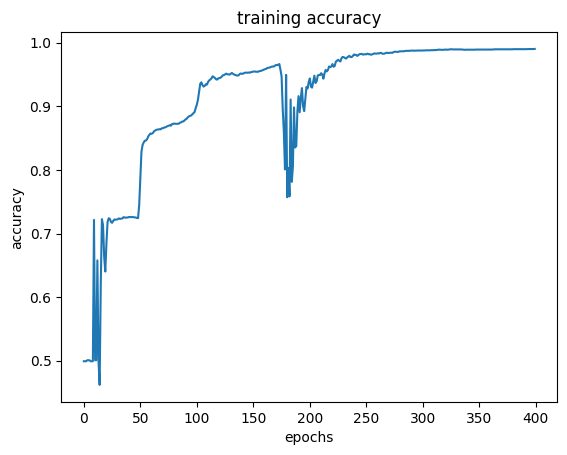

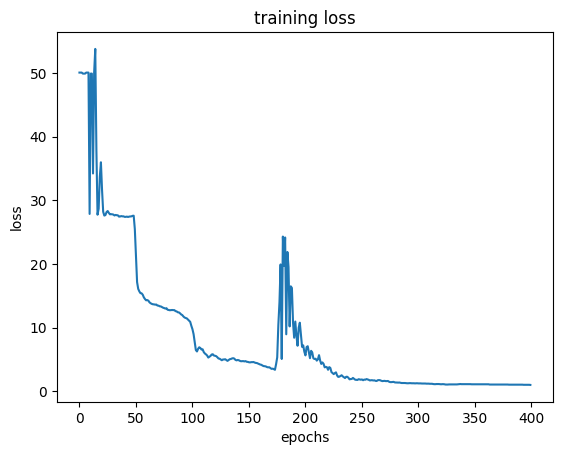

In [ ]:
plot_accuracy(train_accuracy_data)
plot_loss(train_loss_data)

564.6222493969127 562.2490013319965 293.7166969143032 303.8135715069408


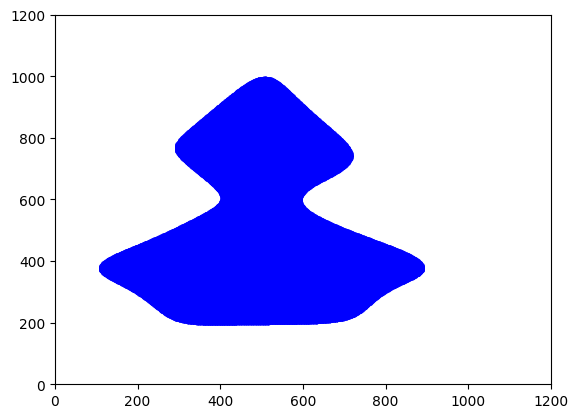

In [ ]:
print(x1_mean, x2_mean, x1_std, x2_std)
vis_polygon(model1,x1_mean, x2_mean, x1_std, x2_std )

## 1c)

In [ ]:
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid_stack = nn.Sequential(
          nn.Linear(2, 20),
          nn.Sigmoid(),
          nn.Linear(20,10),
          nn.Sigmoid(),
          nn.Linear(10,2),
          nn.Sigmoid(),
          nn.Linear(2, 1),
          nn.Sigmoid()  # Add Sigmoid activation at the final output
        )

    def forward(self, x):
        logits = self.linear_sigmoid_stack(x)
        return logits

    def predict(self, x):
      logits = self.forward(x)
      return (logits >= .5).float()

def initialize_weights(model):
  if isinstance(model, nn.Linear):
    nn.init.xavier_uniform_(model.weight)

In [ ]:
# train function

# Train


def train1(x,
          y,
          seed,
          learning_rate,
          epoch_size,
          loss_function=nn.BCELoss(),
          accuracy_function=calc_accuracy):


  train_loss_data = np.zeros((epoch_size,))
  train_accuracy_data = np.zeros((epoch_size,))

  torch.manual_seed(seed)
  model = NeuralNetwork1()
  model.apply(initialize_weights)

  for param in model.parameters():
    print(param.data)
  optimizer = torch.optim.SGD(params = model.parameters(), lr=learning_rate ,momentum=0.9)

  print("")
  print("")
  print("")
  print("")
  print("")
  print("-------SEED: ---------", seed)

  for epoch in range(epoch_size):
    model.train()
    y_hat = model(x)
    loss = loss_function(y_hat, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
      predictions = model.predict(x)

      train_loss = loss_function(predictions, y)
      train_acc = accuracy_function(predictions, y)

      train_loss_data[epoch] = train_loss
      train_accuracy_data[epoch] = train_acc

    if epoch % 20 == 0:
      print("test loss: ", train_loss)
      print("test acc: ", train_acc)

  return model, train_loss, train_acc, train_loss_data, train_accuracy_data

In [ ]:
# DATA PREPROCESSING
trainX, trainY, testX, testY = split_test_training_set(X, Y, 5000)

trainX, x1_mean, x2_mean, x1_std, x2_std = data_preprocessing(trainX)

print(x1_mean, x2_mean, x1_std, x2_std)

tensorX = torch.from_numpy(trainX).type(torch.float32)
tensorY = torch.from_numpy(trainY).type(torch.float32)

print(tensorX.type())
print(tensorX)
print(tensorY.shape[0])

tensorY = tensorY.reshape((tensorY.shape[0], 1))
print(tensorY.shape)

1.1368683772161604e-17 -2.842170943040401e-17 1.0 1.0
torch.FloatTensor
tensor([[-0.1537,  1.0753],
        [ 0.6159,  0.9231],
        [-0.8745, -1.6768],
        ...,
        [-1.1733, -0.7296],
        [ 0.1088, -0.9641],
        [-0.6334, -0.5724]])
5000
torch.Size([5000, 1])


tensor([[ 0.2084, -0.0767],
        [-0.0044,  0.3617],
        [ 0.1745, -0.0208],
        [ 0.1989,  0.4548],
        [ 0.1316, -0.1531],
        [ 0.1711, -0.0457],
        [-0.4083, -0.2016],
        [ 0.2375,  0.0171],
        [ 0.1927, -0.3057],
        [ 0.4937, -0.2179],
        [ 0.1114, -0.2552],
        [-0.2519,  0.2339],
        [-0.1458, -0.3312],
        [-0.2135,  0.3808],
        [ 0.3144,  0.3179],
        [-0.4457,  0.2459],
        [ 0.1304, -0.3512],
        [ 0.0165,  0.1044],
        [-0.2821, -0.2204],
        [ 0.4260, -0.0422]])
tensor([-0.1320, -0.3793, -0.0643,  0.6699, -0.0558,  0.0225, -0.1103,  0.1112,
         0.6300,  0.4324,  0.2510,  0.1537,  0.1667,  0.2732, -0.0914, -0.6572,
        -0.4373,  0.6036,  0.0423, -0.5728])
tensor([[-0.0047, -0.2830, -0.2674,  0.4117,  0.1664, -0.0708,  0.2724, -0.2128,
         -0.3901, -0.4440,  0.1817, -0.1744,  0.2746,  0.3820,  0.1473,  0.3842,
         -0.1030,  0.3897, -0.2132, -0.0587],
        [ 0.2972, -0.2317,

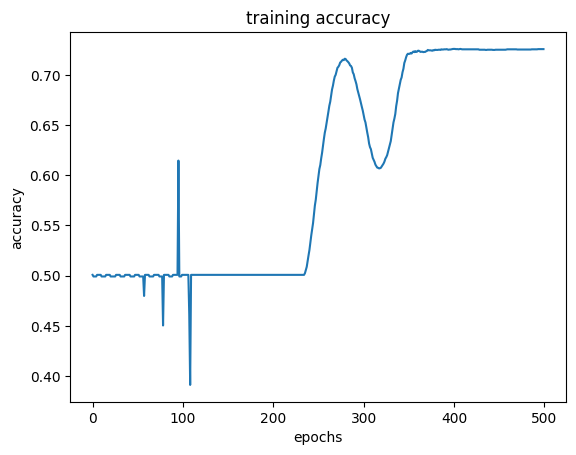

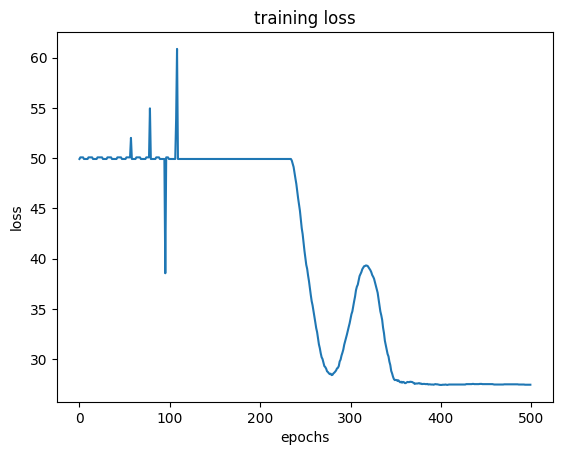

tensor([[-0.3110,  0.4381],
        [-0.5065, -0.4884],
        [ 0.4740,  0.0589],
        [ 0.2682, -0.3579],
        [-0.1077, -0.2735],
        [-0.3898, -0.0564],
        [-0.4835,  0.1506],
        [ 0.3246, -0.2559],
        [ 0.3768,  0.3394],
        [-0.2887, -0.4416],
        [-0.0191, -0.4412],
        [-0.4668, -0.2497],
        [-0.4107, -0.2078],
        [-0.0432,  0.0232],
        [-0.4509,  0.4301],
        [ 0.3432, -0.3514],
        [-0.3368,  0.2259],
        [ 0.4548, -0.3729],
        [-0.1115, -0.4048],
        [-0.1998,  0.5194]])
tensor([ 0.0230, -0.6564,  0.2088, -0.2220, -0.2570,  0.0369, -0.6439,  0.0175,
         0.5729,  0.1398, -0.0778,  0.3222, -0.0619, -0.2279,  0.1713,  0.0750,
         0.2681, -0.1856,  0.5731,  0.4746])
tensor([[-0.0664,  0.1691,  0.4165, -0.4242, -0.0711, -0.3885, -0.0440, -0.3977,
         -0.1664,  0.2200,  0.3897,  0.3510, -0.3246, -0.2859, -0.0874, -0.0629,
         -0.1170, -0.3031,  0.3955,  0.3378],
        [ 0.0287,  0.0351,

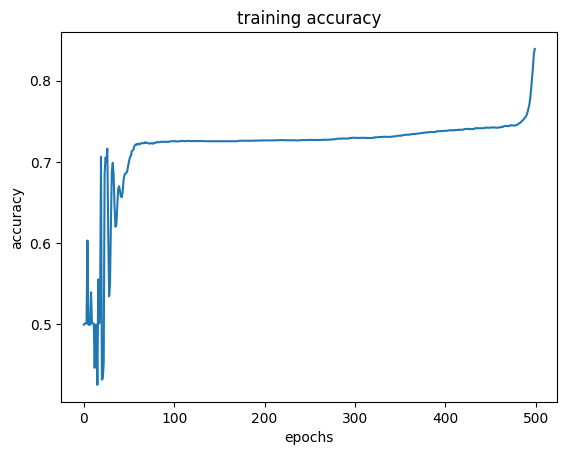

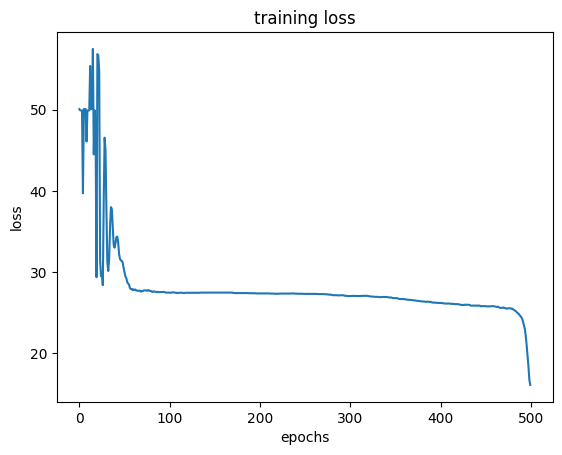

tensor([[-0.2663, -0.2697],
        [-0.4711, -0.0062],
        [ 0.2610, -0.0235],
        [-0.2175, -0.1605],
        [ 0.0152, -0.4297],
        [-0.2907,  0.4071],
        [-0.0834, -0.3316],
        [-0.3089,  0.0176],
        [-0.5134, -0.1783],
        [ 0.4808,  0.4444],
        [ 0.5150,  0.3505],
        [ 0.1046,  0.1194],
        [-0.0047, -0.1078],
        [ 0.3929,  0.2193],
        [-0.3230, -0.0727],
        [-0.2519, -0.3434],
        [-0.0193, -0.0707],
        [-0.1541, -0.3439],
        [ 0.1202,  0.3610],
        [-0.1771, -0.3206]])
tensor([-0.0248,  0.2183, -0.3306,  0.1643, -0.2076, -0.0540,  0.0039,  0.4430,
         0.6024, -0.3713, -0.5123,  0.4454,  0.5708,  0.6128,  0.1013,  0.4406,
         0.4385, -0.4222,  0.5342, -0.5374])
tensor([[-0.2904,  0.3412,  0.2585,  0.2195, -0.2459,  0.0263, -0.2539,  0.2201,
          0.4282,  0.0346, -0.1009, -0.2418, -0.2707, -0.4259, -0.0442,  0.4155,
         -0.3178,  0.0750, -0.1552,  0.4118],
        [-0.4007, -0.2989,

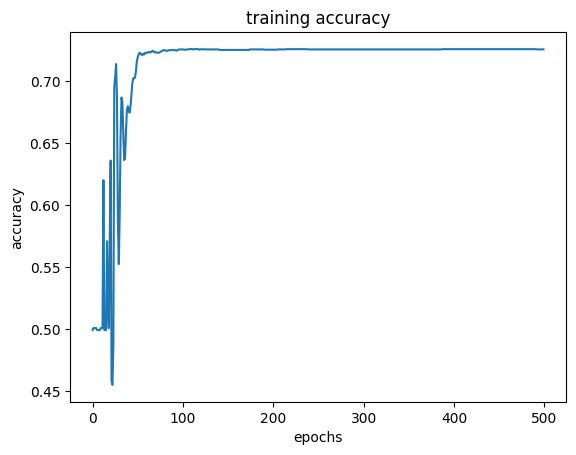

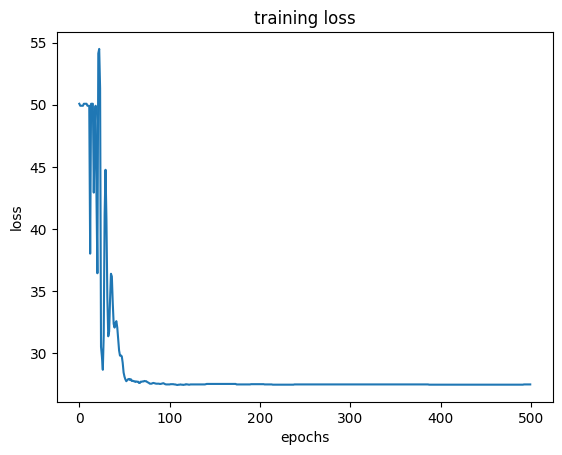

tensor([[-0.0066, -0.0179],
        [ 0.1411, -0.4986],
        [-0.1676,  0.4078],
        [ 0.2161,  0.0252],
        [-0.4707,  0.1378],
        [ 0.0360,  0.0873],
        [ 0.5199, -0.4499],
        [ 0.3422,  0.4198],
        [-0.3819, -0.2537],
        [-0.4466, -0.3870],
        [ 0.2811, -0.3324],
        [-0.1600,  0.3758],
        [-0.4674, -0.2837],
        [ 0.4539,  0.0491],
        [-0.4979,  0.0759],
        [ 0.5205,  0.2787],
        [ 0.1115,  0.4895],
        [-0.2869, -0.3759],
        [ 0.1056,  0.4828],
        [ 0.1359, -0.0952]])
tensor([ 0.4462,  0.2106, -0.6667,  0.0863,  0.5635, -0.4108,  0.6217,  0.6365,
         0.3729, -0.1634, -0.3888,  0.5049,  0.6417,  0.3151, -0.4251, -0.3648,
        -0.4361,  0.1053,  0.0690,  0.1728])
tensor([[ 0.3036,  0.2208,  0.4116, -0.0410,  0.1169, -0.1855,  0.2057, -0.4462,
         -0.1222,  0.3999,  0.1276, -0.3159,  0.1811, -0.1924, -0.3434,  0.2341,
          0.3059, -0.4054,  0.0433,  0.2490],
        [ 0.2095, -0.1515,

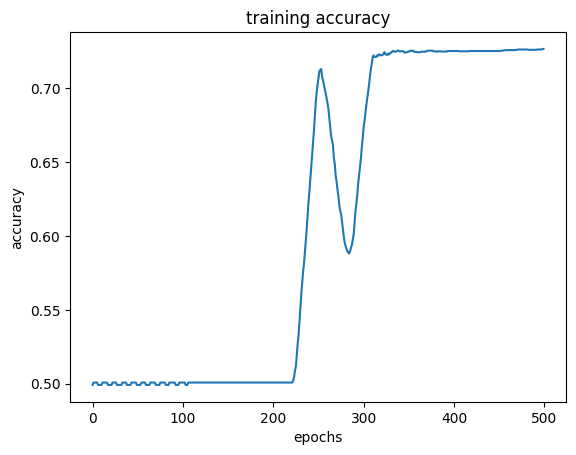

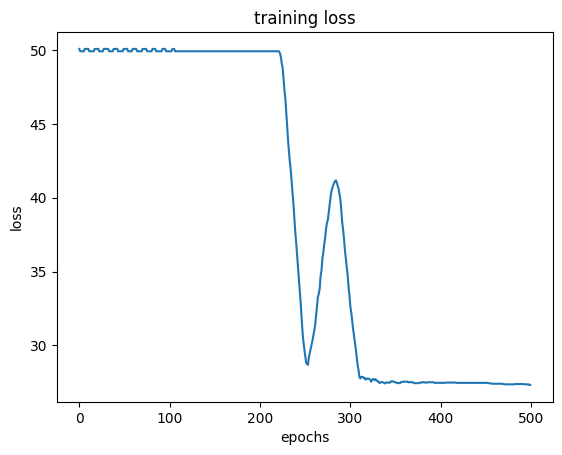

tensor([[-0.2197, -0.4882],
        [ 0.4284,  0.2126],
        [ 0.3621, -0.1695],
        [-0.2186, -0.0907],
        [-0.1565,  0.0692],
        [-0.1185, -0.1488],
        [-0.3695, -0.1964],
        [-0.3579,  0.0364],
        [ 0.3071,  0.2463],
        [ 0.0954, -0.3844],
        [-0.0627, -0.0370],
        [ 0.3861,  0.0898],
        [ 0.3162,  0.4521],
        [-0.0631, -0.4195],
        [-0.4011,  0.4129],
        [-0.2153,  0.0201],
        [ 0.1909, -0.0159],
        [-0.4808, -0.0793],
        [ 0.1070, -0.2319],
        [ 0.0367,  0.0895]])
tensor([ 0.1166, -0.1014, -0.0802, -0.4600,  0.3623, -0.1703, -0.4835, -0.1703,
        -0.0988,  0.6538,  0.3685, -0.2855, -0.1003,  0.6248,  0.4543,  0.1763,
        -0.2537,  0.5884,  0.3029, -0.3149])
tensor([[ 0.1750, -0.1940,  0.4003,  0.3854,  0.2815, -0.2989, -0.2627,  0.0458,
         -0.2347, -0.0005, -0.2200, -0.1890,  0.0523, -0.3593,  0.1138, -0.0312,
         -0.1876, -0.2240, -0.2655,  0.3507],
        [ 0.0159, -0.0968,

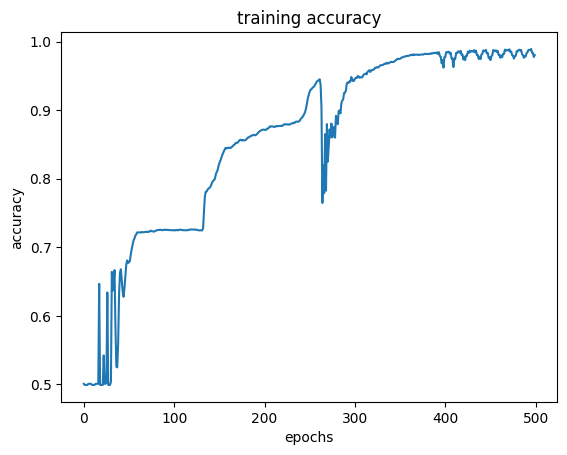

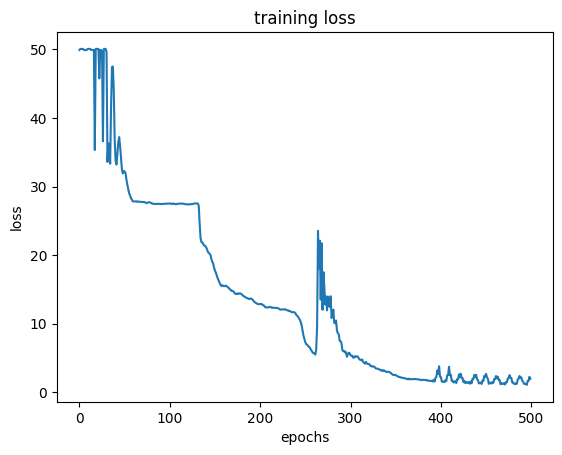

In [ ]:
# train
seeds = [123, 100, 4444, 54, 3]
epoch_size = 500

for seed in seeds:
  model, train_loss, train_acc, train_loss_data, train_accuracy_data = train1(tensorX, tensorY, seed, 1.3, epoch_size)
  plot_accuracy(train_accuracy_data)
  plot_loss(train_loss_data)

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.



## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [18]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler
import torch.nn.functional as F
import tensorflow as tf

### Data Loading

In [20]:
import tensorflow as tf

# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

In [23]:
## test dataset
# img =[]
# for images in test_dataloader:
#   img = images
#   exit

# print(tf.shape(img))

first_batch = next(iter(train_dataloader))

# Extract the first sample from the batch
first_image, first_label = first_batch[0][0], first_batch[1][0]

# Print out the shape of the first image and the label
print(f"First image shape: {first_image.shape}")
print(f"First label: {first_label}")

First image shape: torch.Size([1, 28, 28])
First label: 0


## Problem 2a)

### Design Model

In [ ]:
class CNNet(nn.Module):

    """

    """

    def __init__(self):
        """

        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

    def forward(self, x):
        """

        """
        ##TODO: Setup Forward Pass
        return NotImplementedError

### Model Training

In [ ]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    #TODO: Implement a training loop
    # Your function can return the model, train loss, and validation accuracy
    """
    # TODO:
    raise NotImplementedError

NameError: name 'train_dataloader' is not defined

In [ ]:
## Hyperparameters
EPOCH = 50
LR = ##TODO: Choose a Learning Rate

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = ##TODO: Choose an optimized
loss_f = ##TODO: Choose a loss

In [ ]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [2]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

NameError: name 'tfs' is not defined

### Model Design

In [ ]:
##TODO: Try to improve upon your previous architecture

### Model Training

In [ ]:
##TODO: Fit and evaluate your model. What do you observe?

## Problem 2c)

Write down your response in the final report.